In [73]:
####importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd 
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
#### loading dataset
data = pd.read_csv('Downloads/dataset.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
####statistical anlysis of the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
##### checking weather the data have any null values or not
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

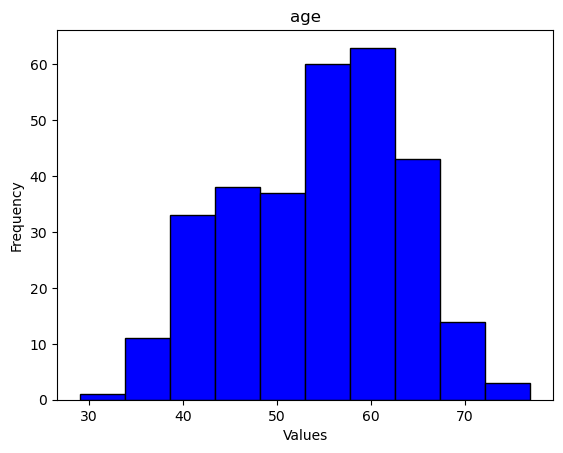

In [8]:
####EDA Eploratory data analysis using histplot
plt.hist(data['age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('age')
plt.show()

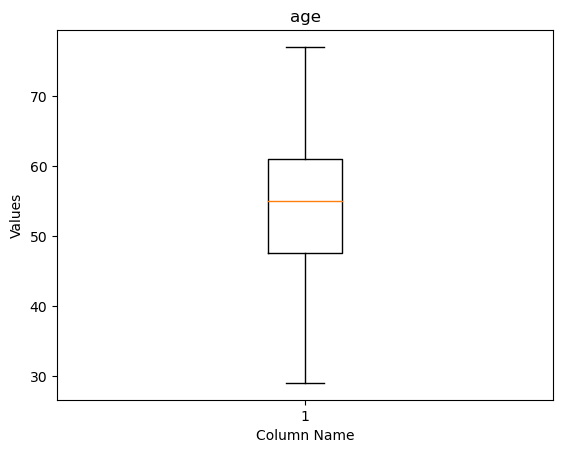

In [9]:
#### using boxplot to determine the outliers
#### using box plot to see wether the age feature is containing any outlier
plt.boxplot(data['age'])
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('age')
plt.show()


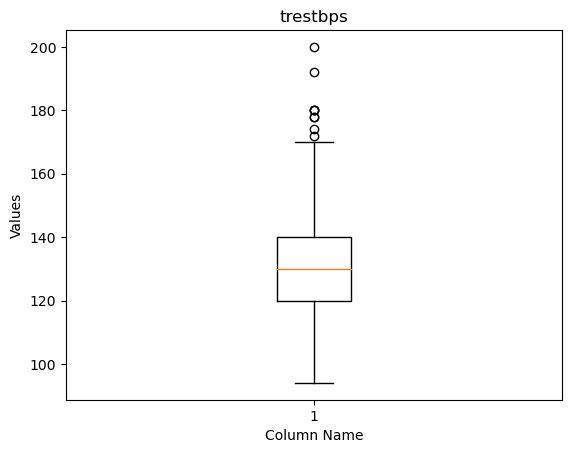

In [10]:
##### outliers in the 'trestbps' so we have to hande the outliers .
plt.boxplot(data['trestbps'])
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('trestbps')
plt.show()

In [74]:
#### handling the outliers using IQR technique ('INTER QUANTILE RANGE')
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['trestbps'] < lower_bound) | (data['trestbps'] > upper_bound)]
cleaned_data = data[(data['trestbps'] >= lower_bound) & (data['trestbps'] <= upper_bound)]

In [19]:
cleaned_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


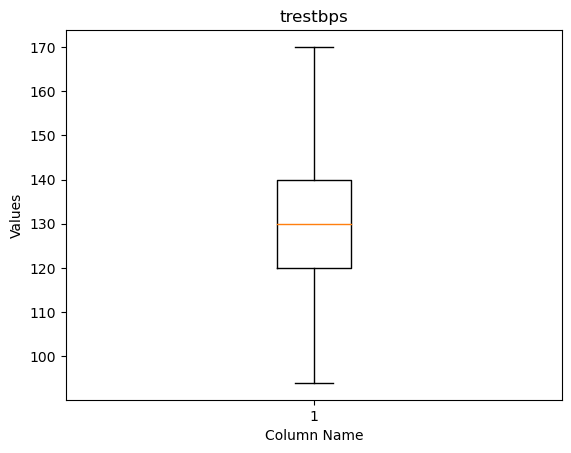

In [20]:
#### Ploting boxplot after removing the  outliers .
plt.boxplot(cleaned_data['trestbps'])
plt.xlabel('Column Name')
plt.ylabel('Values')
plt.title('trestbps')
plt.show()

In [38]:
cleaned_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


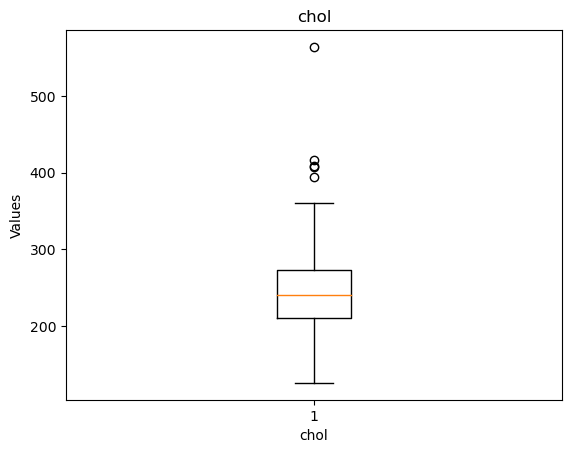

In [39]:
#### the feature 'chor' containing the outliers.
plt.boxplot(cleaned_data['chol'])
plt.xlabel('chol')
plt.ylabel('Values')
plt.title('chol')
plt.show()

In [57]:
#### handling the outliers using Z-SCORE we can use both IQR and Z-SCORE for removing the outliers.
z_scores = (cleaned_data['chol'] - cleaned_data['chol'].mean()) / cleaned_data['chol'].std()
threshold = 3
outliers = cleaned_data[np.abs(z_scores) > threshold]
cleaned_data1 = cleaned_data[np.abs(z_scores) <= threshold]


In [58]:
cleaned_data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


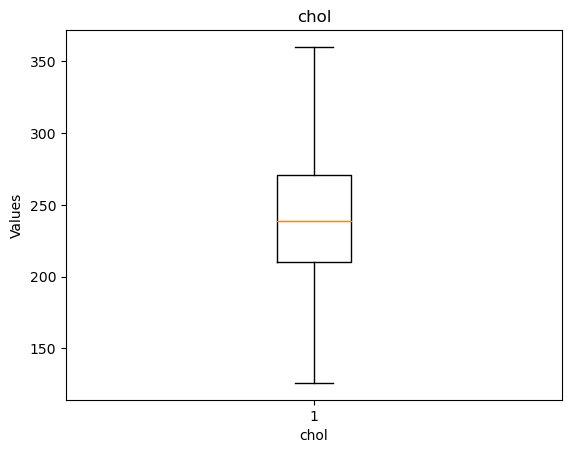

In [59]:
####outliers are removed using Z-SCORE.
plt.boxplot(cleaned_data1['chol'])
plt.xlabel('chol')
plt.ylabel('Values')
plt.title('chol')
plt.show()

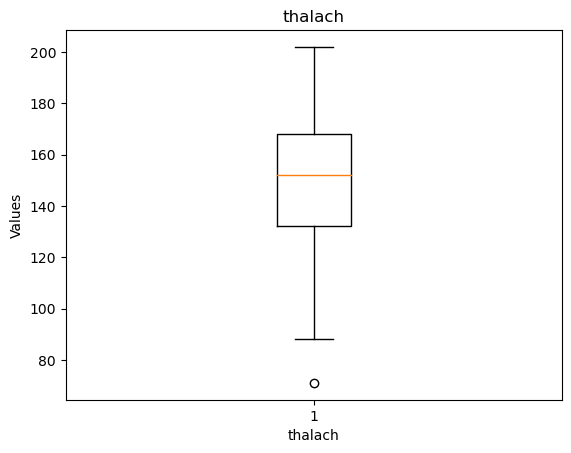

In [60]:
#### Feature 'thalch' containing outlier so we can reomove it using Z-SCORE.
plt.boxplot(cleaned_data1['thalach'])
plt.xlabel('thalach')
plt.ylabel('Values')
plt.title('thalach')
plt.show()

In [62]:
#### Using Z-SCORE to remove the outliers.
z_scores = (cleaned_data1['thalach'] - cleaned_data1['thalach'].mean()) / cleaned_data1['thalach'].std()
threshold = 3
outliers1 = cleaned_data1[np.abs(z_scores) > threshold]
cleaned_data2 = cleaned_data1[np.abs(z_scores) <= threshold]


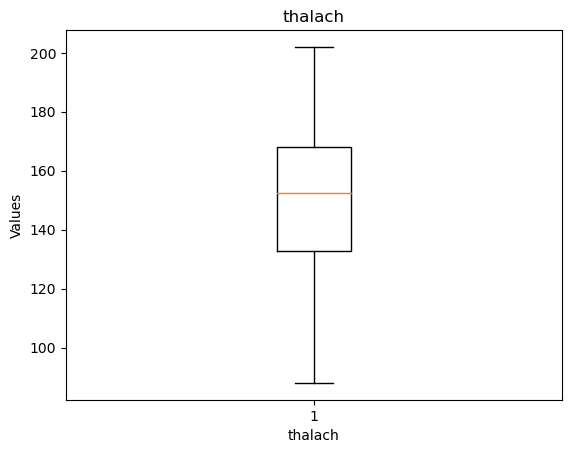

In [63]:
#### outliers reomoved using Z-SCORE.
plt.boxplot(cleaned_data2['thalach'])
plt.xlabel('thalach')
plt.ylabel('Values')
plt.title('thalach')
plt.show()

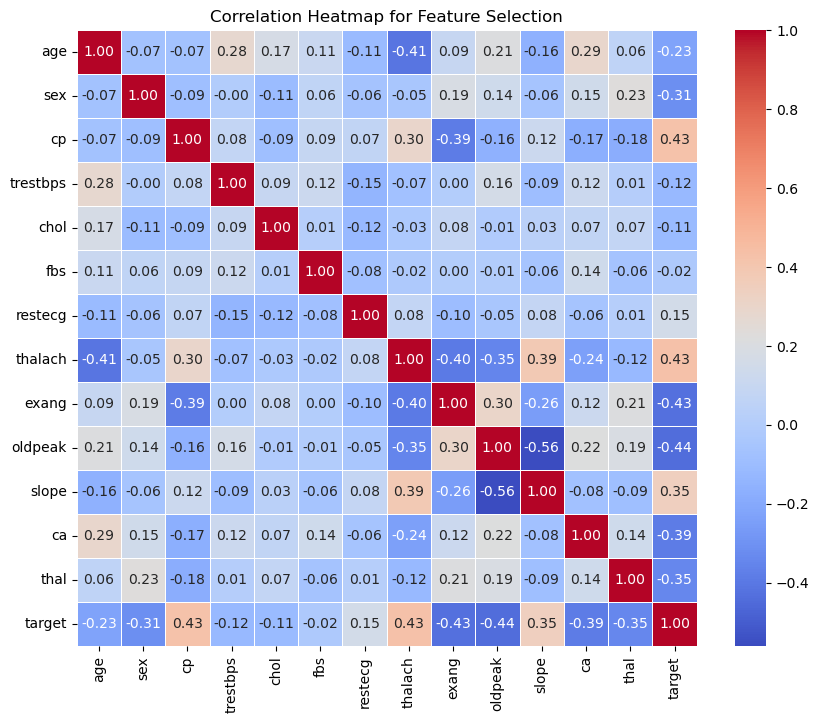

In [70]:
#### Ploting heatmap to detrmine the relation b/w the feature for the feature selection 
correlation_matrix = cleaned_data2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Feature Selection')
plt.show()

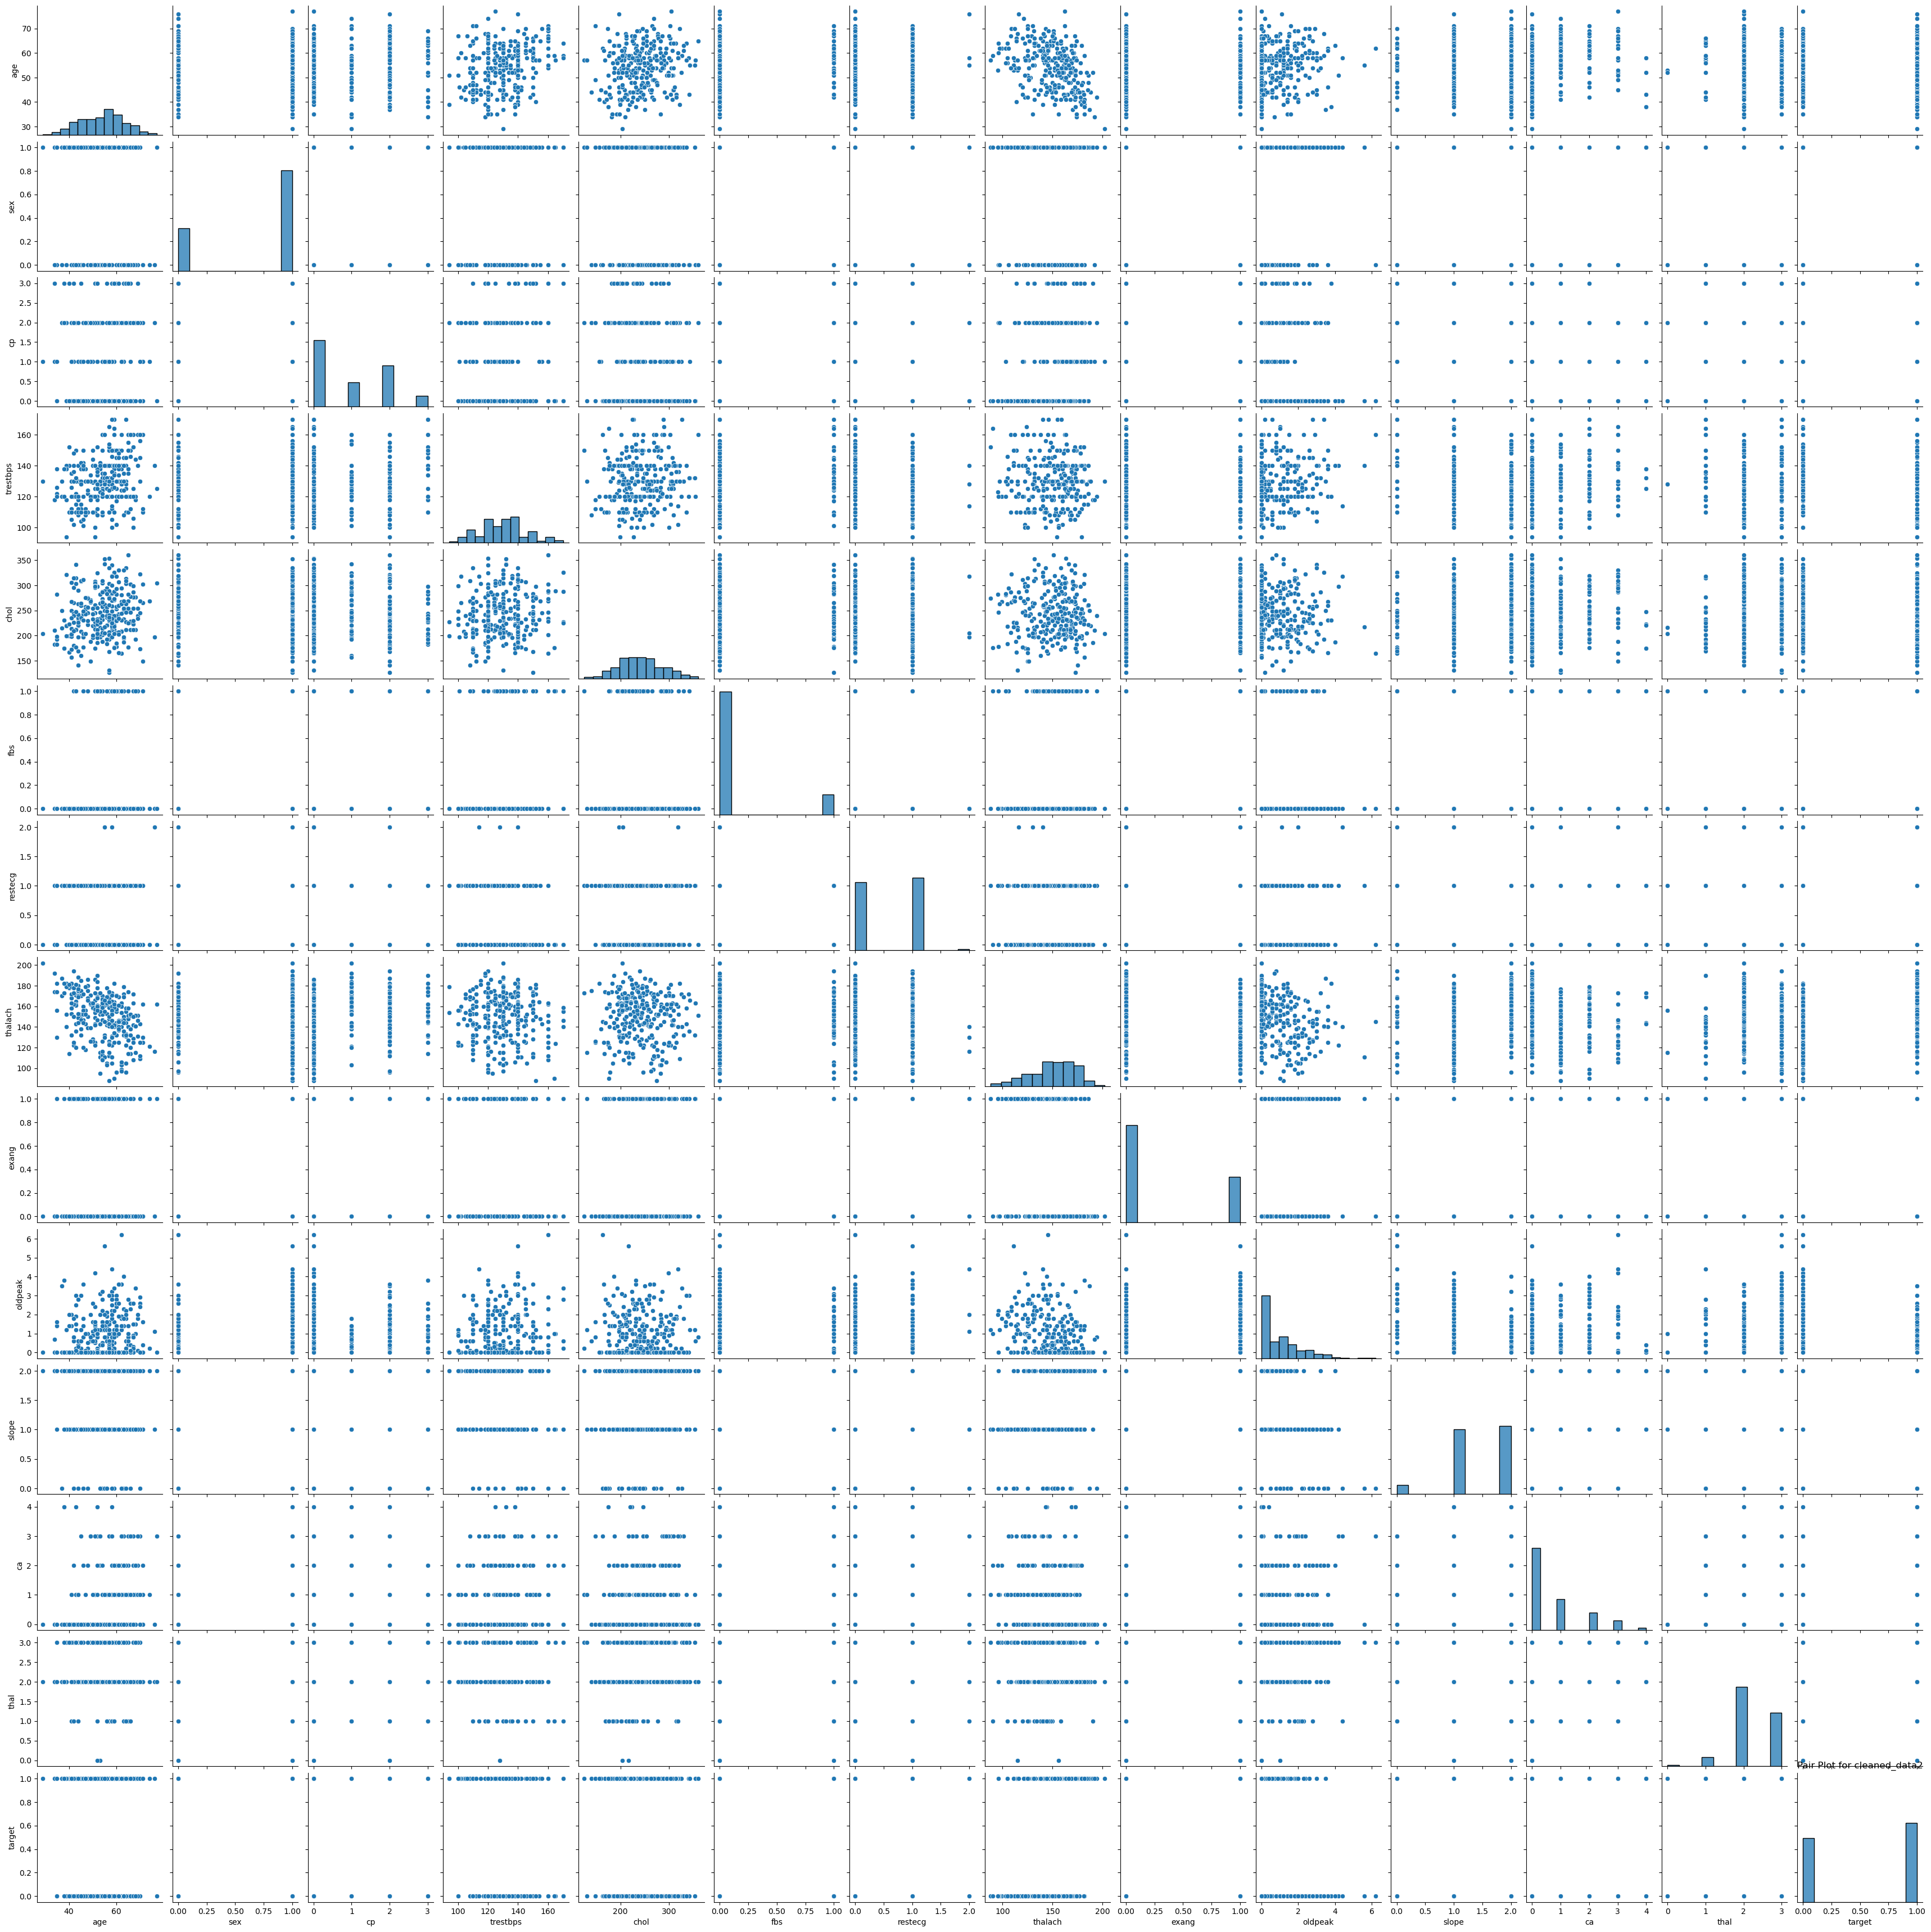

In [71]:
#### pair plot also used to know the wich feaures are similar to eachother.
sns.pairplot(cleaned_data2)
plt.title('Pair Plot for cleaned_data2')
plt.show()

In [76]:
#### deviding the data set into x and y to spreate independent and dependent features respectively.
y = cleaned_data['target']
X = cleaned_data.drop(columns=['target'])



In [78]:
#### scaling the data using MinMaxsclar() to convert all the x features in same unit.
scaler = MinMaxScaler()


In [79]:
#### fitting the MinMaxscalar to scale .
scaler.fit(X)

MinMaxScaler()

In [80]:
####trasnsformin the data in same scale.
transform_data = scaler.transform(X)

In [81]:
transform_data

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [83]:
#### spliting the data in train_test_splitt for training and to do the predictions.
x_train,x_test,y_train,y_test = train_test_split(transform_data,y,test_size=0.25,random_state=0)

In [84]:
#### checking the split of the data.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(217, 13)
(73, 13)
(217,)
(73,)


In [505]:
#### Creating the model sequential model .
#### adding '16' input layers. using activation function "relu" for input the features in input layer.
#### adding '20' hidden layers. using "relu" function.
#### 
model = Sequential()
model.add(Dense(units=16,activation='relu',input_shape =(13,)))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [506]:
#### taking optimizer Adam for model optimization.
#### compiling the loss function and optimizer with acc_score using matrics.
adam_opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=adam_opt,metrics=['accuracy'])

In [507]:
#### fitting the model and giving 150 eposch to perform .it will go through the data as per eposch times.
#### training the model.
model.fit(x_train,y_train,epochs=150)

Epoch 1/150
7/7 [==============================] - 1s 4ms/step - loss: 0.7333 - accuracy: 0.2627
Epoch 2/150
7/7 [==============================] - 0s 3ms/step - loss: 0.7135 - accuracy: 0.3687
Epoch 3/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.4977
Epoch 4/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.6129
Epoch 5/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6267
Epoch 6/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.6406
Epoch 7/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6728
Epoch 8/150
7/7 [==============================] - 0s 6ms/step - loss: 0.6452 - accuracy: 0.7051
Epoch 9/150
7/7 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.7235
Epoch 10/150
7/7 [==============================] - 0s 3ms/step - loss: 0.6282 - accuracy: 0.7373
Epoch 11/150
7/7 [===========

In [508]:
#### predicting the values 
predict = model.predict(x_test)
predict

3/3 [==============================] - 0s 4ms/step


array([[0.79357845],
       [0.5328881 ],
       [0.06226615],
       [0.88395524],
       [0.01579557],
       [0.8569543 ],
       [0.40149653],
       [0.00937573],
       [0.9981245 ],
       [0.5289811 ],
       [0.99463135],
       [0.9942707 ],
       [0.7482016 ],
       [0.7173407 ],
       [0.98533016],
       [0.2319225 ],
       [0.10465969],
       [0.9866051 ],
       [0.0064239 ],
       [0.99395967],
       [0.86539817],
       [0.00133608],
       [0.8463806 ],
       [0.12252104],
       [0.45095634],
       [0.00493212],
       [0.08753992],
       [0.02399706],
       [0.12118595],
       [0.00526813],
       [0.62088096],
       [0.86289084],
       [0.6651598 ],
       [0.08067244],
       [0.29285353],
       [0.5521572 ],
       [0.8571126 ],
       [0.14138843],
       [0.90834576],
       [0.7941288 ],
       [0.9175457 ],
       [0.00172621],
       [0.02926308],
       [0.05045754],
       [0.0043865 ],
       [0.9965382 ],
       [0.99306816],
       [0.002

In [509]:
#### tranforming the predicted values row into columns.
predict = tf.squeeze(predict)
predict

<tf.Tensor: shape=(73,), dtype=float32, numpy=
array([0.79357845, 0.5328881 , 0.06226615, 0.88395524, 0.01579557,
       0.8569543 , 0.40149653, 0.00937573, 0.9981245 , 0.5289811 ,
       0.99463135, 0.9942707 , 0.7482016 , 0.7173407 , 0.98533016,
       0.2319225 , 0.10465969, 0.9866051 , 0.0064239 , 0.99395967,
       0.86539817, 0.00133608, 0.8463806 , 0.12252104, 0.45095634,
       0.00493212, 0.08753992, 0.02399706, 0.12118595, 0.00526813,
       0.62088096, 0.86289084, 0.6651598 , 0.08067244, 0.29285353,
       0.5521572 , 0.8571126 , 0.14138843, 0.90834576, 0.7941288 ,
       0.9175457 , 0.00172621, 0.02926308, 0.05045754, 0.0043865 ,
       0.9965382 , 0.99306816, 0.0021058 , 0.68749046, 0.00532865,
       0.8855281 , 0.8004057 , 0.01634958, 0.99670416, 0.7236777 ,
       0.39468735, 0.9133394 , 0.9342041 , 0.9731405 , 0.00332255,
       0.01820793, 0.43844846, 0.6758572 , 0.10659356, 0.67901444,
       0.84450686, 0.7548691 , 0.9696312 , 0.00529995, 0.7593802 ,
       0.044726

In [510]:
#### giving the condition for the predicted values to get the output in the form of '1' or '0'.
predict = np.array([1 if x>0.5 else 0 for x in predict])
predict

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1])

In [511]:
#### creating variable 'actual' to store the target values.
actual = np.array(y_test)
actual

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [512]:
#### using confusion matrix for the evaluation of the model.
conf_mat = confusion_matrix(actual,predict)
conf_mat

array([[29,  6],
       [ 3, 35]], dtype=int64)

In [513]:
#### evaluating the performance of the model using accuracy_score.
acc = accuracy_score(actual,predict)
acc

0.8767123287671232

In [ ]:
##### model has achived the 87% of accuracy using the sigmoid function 
#### using sequential model .
#### model predicted the weather person will have heartattack or not, with 87% of accuracy.